PROYECTO DE BI PARA ESCUELA DEPORTIVA, TABLA DOCENTE

PAQUETES E IMPORTACIONES A UTILIZAR

In [1]:
#crear entorno virtual en la carpeta del proyecto:
# python -m venv env o mi_entorno
# env/Script/Activate         para activar el entorno virtual en windows
# source env/bin/activate     para activar en linux
#instalar las siguientes librerias

#desactivar /   deactivate

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer #pip install scikit-learn


Cargar los datos

In [2]:
data = pd.read_csv('data/datos_sinprocesar/docente_202510042014.csv')

Visualizar los datos

In [3]:
data.head()

,id_docente,nombre_docente
0,1,Pedro Gómez
1,2,Profesor Común
2,3,Profesor Común
3,4,Profesor Común
4,5,Ana López


Verificar la estructura de los datos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_docente      1000 non-null   int64 
 1   nombre_docente  904 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Estadistico

In [5]:
data.describe()

,id_docente
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


Estadistica de Campos Categoricos

In [6]:
data.describe(include='O')

,nombre_docente
count,904
unique,31
top,Profesor Común
freq,628


Visualizar el tamaño del dataset (dataframe)

In [7]:
data.shape

(1000, 2)

Outlier modo grafico

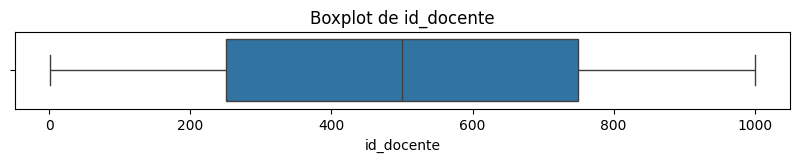

In [8]:
cols = data.select_dtypes(include=['number']).columns
for col in cols:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=data[cols], x=col)
    #sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

outliers - calculado

rango intercuartilico

In [9]:
outliers = {}

for col in cols:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3 - Q1  # Rango Intercuartílico

    LI = Q1 - 1.5 * IQR  # Límite inferior
    LS = Q3 + 1.5 * IQR  # Límite superior

    outliers_col = data[(data[col] < LI) | (data[col] > LS)][col]
    outliers[col] = outliers_col

    print(f'{col}: {len(outliers_col)} outliers')
    print(f'  Límites: [{LI:.2f}, {LS:.2f}]')
    print(f'  Min: {data[col].min()}, Max: {data[col].max()}')
    print('-' * 40)

id_docente: 0 outliers
  Límites: [-498.50, 1499.50]
  Min: 1, Max: 1000
----------------------------------------


Valores Nulos

In [11]:
data.isna().mean()*100

id_docente        0.0
nombre_docente    9.6
dtype: float64

Eliminar valores Nulos

In [ ]:
# Eliminar filas con valores nulos en la columna y filas donde el nombre esta vacio (cadena vacia o solo espacios)
data = data[data['nombre_docente'].notna() & (data['nombre_docente'].str.strip() != '')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_docente      904 non-null    int64 
 1   nombre_docente  904 non-null    object
dtypes: int64(1), object(1)
memory usage: 21.2+ KB


Eliminar datos inconsistentes

In [27]:
import re

# Palabras clave indicativas de datos inconsistentes
patron = r'docente test|test|prueba|desconocido|común|profesor común'

data = data[
    data['nombre_docente'].notna() &
    (data['nombre_docente'].str.strip() != '') &
    (~data['nombre_docente'].str.lower().str.contains(patron, na=False))
]



In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_docente      276 non-null    int64 
 1   nombre_docente  276 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.5+ KB


Guardar data procesada

In [30]:
data.to_csv('data/datos_procesador/docente_limpio.csv', index=False)
